In [35]:
import numpy as np
from matplotlib import pyplot as plt
import math as m

In [36]:
a = -0.8
b = 0.8
n = 3
#X = [round(a+((b-a)*i)/(n-1) , 4) for i in range(0 , n)]#узлы сетки

In [37]:
def fx(x):
    return (m.e**(-x))*m.sin(x)
def dfx(x):
    return (m.e**(-x))*(m.cos(x)-m.sin(x))
def d2fx(x):
    return -2*(m.e**(-x))*m.cos(x)

In [41]:
def right_diff(x,h):
    return (fx(x+h) - fx(x)) / h
def left_diff(x,h):
    return (fx(x) - fx(x-h))/ h
def central_diff(x,h):
    return (fx(x+h) - fx(x-h)) / (2*h)
def second_diff_2(x,h):
    return  (fx(x+h) - 2*fx(x) + fx(x-h)) / (h*h)
def second_diff_4(x,h):
    return  (-fx(x+2*h) + 16*fx(x+h)-30*fx(x)+16*fx(x-h)-fx(x-2*h))/(12*h*h)

In [84]:
def diff_X_and_error(a,b,n):
    h = (b-a)/(n-1)
    X = [round(a+((b-a)*i)/(n-1) , 7) for i in range(0 , n)]#узлы сетки
    dy_only_right = [right_diff(x,h) for x in X]
    dy_only_left = [left_diff(x,h) for x in X]
    dy_only_central = [central_diff(x,h) for x in X]
    dy = dy_only_central.copy()
    dy[0] = dy_only_right[0]
    dy[n-1] = dy_only_left[n-1]
    d2y_2 = [second_diff_2(x,h) for x in X]
    d2y_4 = [second_diff_4(x,h) for x in X]
    real_dy = [dfx(x) for x in X]
    real_d2y = [d2fx(x) for x in X]
    dy_only_right_error =  np.abs(np.subtract(real_dy,dy_only_right))
    dy_only_left_error =  np.abs(np.subtract(real_dy,dy_only_left))
    dy_only_central_error =  np.abs(np.subtract(real_dy,dy_only_central))
    dy_error =  np.abs(np.subtract(real_dy,dy))
    d2y_2_error =  np.abs(np.subtract(real_d2y,d2y_2))
    d2y_4_error =  np.abs(np.subtract(real_d2y,d2y_4))
    return dy_only_right, dy_only_left, dy_only_central, dy, d2y_2, d2y_4, dy_only_right_error, dy_only_left_error, dy_only_central_error, dy_error, d2y_2_error, d2y_4_error, h

    

In [85]:
#dy_only_right, dy_only_left, dy_only_central, dy, d2y_2, d2y_4, dy_only_right_error, dy_only_left_error, dy_only_central_error, dy_error, d2y_2_error, d2y_4_error, h = diff_X_and_error(a,b,n)

In [89]:
plt_dy_only_right_error =[]
plt_dy_only_left_error = []
plt_dy_only_central_error = []
plt_dy_error = []
plt_d2y_2_error = []
plt_d2y_4_error = []
H = []
N = []

for i in range(3,1000):
    dy_only_right, dy_only_left, dy_only_central, dy, d2y_2, d2y_4, dy_only_right_error, dy_only_left_error, dy_only_central_error, dy_error, d2y_2_error, d2y_4_error, h = diff_X_and_error(a,b,i)
    plt_dy_only_right_error.append(np.max(dy_only_right_error))
    plt_dy_only_left_error.append(np.max(dy_only_left_error))
    plt_dy_only_central_error.append(np.max(dy_only_central_error))
    plt_dy_error.append(np.max(dy_error))
    plt_d2y_2_error.append(np.max(d2y_2_error))
    plt_d2y_4_error.append(np.max(d2y_4_error))
    N.append(i)
    H.append(h)
H =  np.log(H)

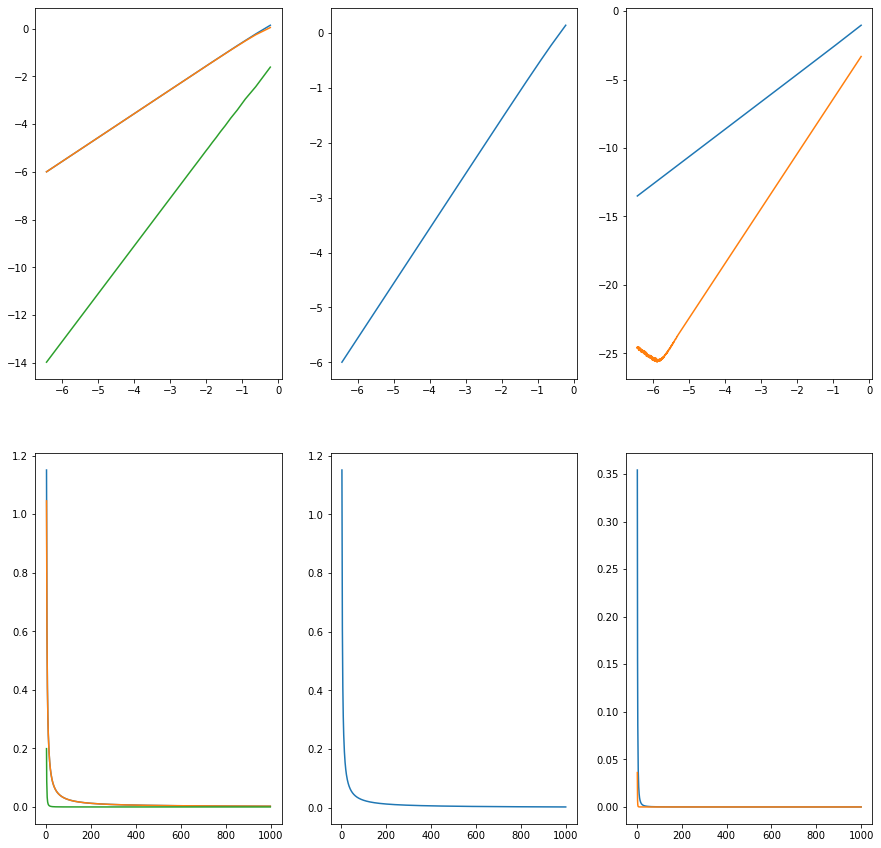

In [90]:
plt.rcParams["figure.figsize"] = (15,15)
plt.subplot(2,3,1)
plt.plot(H, np.log(plt_dy_only_right_error))
plt.plot(H, np.log(plt_dy_only_left_error))
plt.plot(H, np.log(plt_dy_only_central_error))

plt.subplot(2,3,2)
plt.plot(H, np.log(plt_dy_error))

plt.subplot(2,3,3)
plt.plot(H, np.log(plt_d2y_2_error))
plt.plot(H, np.log(plt_d2y_4_error))

plt.subplot(2,3,4)
plt.plot(N, plt_dy_only_right_error)
plt.plot(N, plt_dy_only_left_error)
plt.plot(N, plt_dy_only_central_error)

plt.subplot(2,3,5)
plt.plot(N, plt_dy_error)

plt.subplot(2,3,6)
plt.plot(N, plt_d2y_2_error)
plt.plot(N, plt_d2y_4_error)
plt.show()

In [91]:
print("tan_dy_only_right_error:", np.mean(np.log(plt_dy_only_right_error) / H))
print("tandy_only_left_error:", np.mean(np.log(plt_dy_only_left_error) / H))
print("tan_dy_only_central_error:",np.mean(np.log(plt_dy_only_central_error) / H))
print("tan_dy_error:", np.mean(np.log(plt_dy_error) / H))
print("tan_d2y_2_error:", np.mean(np.log(plt_d2y_2_error) / H))
print("tan_d2y_4_error:",np.mean(np.log(plt_d2y_4_error) / H))

tan_dy_only_right_error: 0.9132091925184196
tandy_only_left_error: 0.9137528041931703
tan_dy_only_central_error: 2.218932814626313
tan_dy_error: 0.9132369067743814
tan_d2y_2_error: 2.12517010938661
tan_d2y_4_error: 4.335043312611709


In [ ]:
'''
Заключение

Из графиков видно, что при использование не только центральной разности,
но и других максимальная ошибка уменьшается при уменьшении шага так,
как если бы мы использовали только правую и\или левую разности.
Это же видно из логорифмических грофиков зависимости
и посчитанным к ним тангенсам.
В целом все полученные значения и графики совпадают с теорией

'''